In [32]:
%load_ext autoreload
%autoreload 2 
from fibsem import utils, milling, acquire, constants 
from fibsem.microscope import FibsemMicroscope, ThermoMicroscope
from fibsem.structures import FibsemPatternSettings, FibsemPattern, FibsemImage, BeamType, FibsemStagePosition, Point, FibsemManipulatorPosition, FibsemRectangle
import matplotlib
import matplotlib.pyplot as plt
import math 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Connection & set up

In [33]:
microscope, settings = utils.setup_session(config_path= r"C:\Users\lnae0002\Desktop\fibsem\fibsem\config", protocol_path=r'C:\Users\lnae0002\Desktop\fibsem\example\protocol_autolamella.yaml')
assert isinstance(microscope, FibsemMicroscope)

2023-04-19 14:05:45,302 — root — INFO — connect_to_microscope:2089 — Microscope client connecting to [localhost:8300]
2023-04-19 14:05:45,306 — root — INFO — connect_to_microscope:2091 — Microscope client connected to [localhost:8300]
2023-04-19 14:05:45,307 — root — INFO — setup_session:228 — Finished setup for session: autolamella_demo_2023-04-19-02-05-45PM


In [33]:
print(settings.protocol)

{'name': 'autolamella_demo', 'stage_rotation': 50.0, 'stage_tilt': 20.0, 'application_file': 'autolamella', 'fiducial': {'length': 1e-05, 'width': 1e-05, 'depth': 2e-06}, 'lamella': {'protocol_stages': [{'lamella_width': 1e-05, 'lamella_height': 5e-06, 'trench_height': 1e-05, 'milling_depth': 2e-06, 'offset': 5e-06, 'size_ratio': 1.0, 'milling_current': 2e-09, 'cleaning_cross_section': 1.0}, {'lamella_width': 1e-05, 'lamella_height': 5e-06, 'trench_height': 1e-06, 'milling_depth': 2e-06, 'offset': 5e-07, 'size_ratio': 1.0, 'milling_current': 2e-10, 'cleaning_cross_section': 1.0}, {'lamella_width': 1e-05, 'lamella_height': 5e-06, 'trench_height': 5e-07, 'milling_depth': '0.4.e-6', 'offset': 0.0, 'size_ratio': 1.0, 'milling_current': 6e-11, 'cleaning_cross_section': 1.0}]}}


In [34]:
def plot_images(eb_image, ib_image):    
    fig, ax = plt.subplots(1, 2, figsize=(10, 7))
    ax[0].imshow(eb_image.data, cmap="gray")
    ax[0].set_title("Electron Image")
    ax[1].imshow(ib_image.data, cmap="gray")
    ax[1].set_title("Ion Image")
    plt.show()

Acquire images

2023-04-18 14:17:10,049 — root — INFO — acquire_image:2103 — acquiring new ELECTRON image.
2023-04-18 14:17:12,668 — root — INFO — acquire_image:2103 — acquiring new ION image.


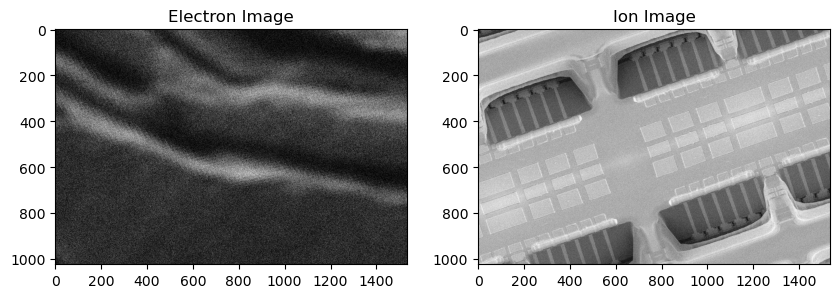

In [35]:
settings.image.autocontrast = False
settings.image.beam_type = BeamType.ELECTRON
eb_image = acquire.new_image(microscope, settings.image)
settings.image.beam_type = BeamType.ION
ib_image = acquire.new_image(microscope, settings.image)

plot_images(eb_image, ib_image)

2023-04-18 14:07:44,327 — root — INFO — acquire_image:2103 — acquiring new ELECTRON image.
2023-04-18 14:07:46,926 — root — INFO — acquire_image:2103 — acquiring new ION image.


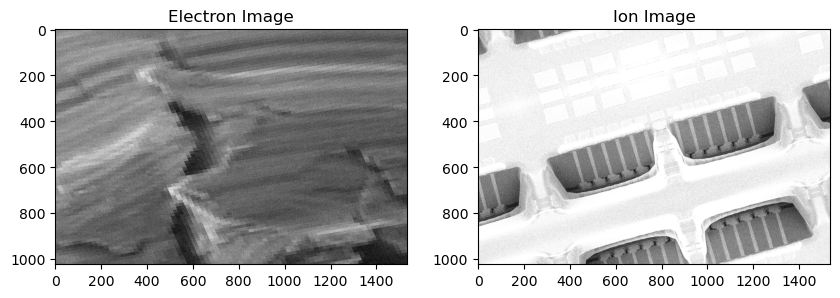

In [7]:
ref_images = acquire.take_reference_images(microscope, settings.image)
plot_images(ref_images[0], ref_images[1])

In [8]:
assert isinstance(eb_image, FibsemImage)
assert isinstance(ib_image, FibsemImage)
assert isinstance(ref_images[0], FibsemImage)
assert isinstance(ref_images[1], FibsemImage)
assert ib_image.metadata.compare_image_settings(settings.image)
assert ref_images[1].metadata.compare_image_settings(settings.image)
assert eb_image.metadata.version == "v1"
assert ib_image.metadata.version == "v1"
assert ref_images[0].metadata.version == "v1"
assert ref_images[1].metadata.version == "v1"
assert eb_image.metadata.detector_settings.type == microscope.get("detector_type", beam_type=BeamType.ELECTRON)
assert ib_image.metadata.detector_settings.type == microscope.get("detector_type", beam_type=BeamType.ION)
assert ref_images[0].metadata.detector_settings.type == microscope.get("detector_type", beam_type=BeamType.ELECTRON)
assert ref_images[1].metadata.detector_settings.type == microscope.get("detector_type", beam_type=BeamType.ION)
assert eb_image.metadata.detector_settings.contrast == microscope.get("detector_contrast", beam_type=BeamType.ELECTRON)
assert ib_image.metadata.detector_settings.contrast == microscope.get("detector_contrast", beam_type=BeamType.ION)
assert ref_images[0].metadata.detector_settings.contrast == microscope.get("detector_contrast", beam_type=BeamType.ELECTRON)
assert ref_images[1].metadata.detector_settings.contrast == microscope.get("detector_contrast", beam_type=BeamType.ION)
assert eb_image.metadata.detector_settings.brightness == microscope.get("detector_brightness", beam_type=BeamType.ELECTRON)
assert ib_image.metadata.detector_settings.brightness == microscope.get("detector_brightness", beam_type=BeamType.ION)
assert ref_images[0].metadata.detector_settings.brightness == microscope.get("detector_brightness", beam_type=BeamType.ELECTRON)
assert ref_images[1].metadata.detector_settings.brightness == microscope.get("detector_brightness", beam_type=BeamType.ION)
if isinstance(microscope, ThermoMicroscope):
    assert eb_image.metadata.detector_settings.mode == microscope.get("detector_mode", beam_type=BeamType.ELECTRON)
    assert ib_image.metadata.detector_settings.mode == microscope.get("detector_mode", beam_type=BeamType.ION)
    assert ref_images[0].metadata.detector_settings.mode == microscope.get("detector_mode", beam_type=BeamType.ELECTRON)
    assert ref_images[1].metadata.detector_settings.mode == microscope.get("detector_mode", beam_type=BeamType.ION)

Last image

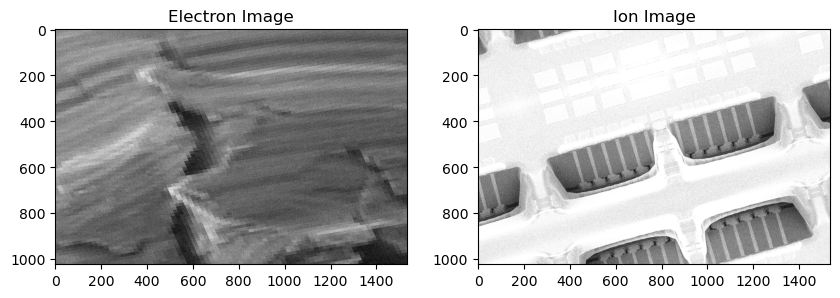

In [9]:
last_eb = microscope.last_image(beam_type=BeamType.ELECTRON)
last_ib = microscope.last_image(beam_type=BeamType.ION)

plot_images(last_eb, last_ib)


In [10]:
assert isinstance(last_eb, FibsemImage)
assert isinstance(last_ib, FibsemImage)
assert last_ib.metadata.compare_image_settings(settings.image)
assert last_eb.metadata.version == "v1"
assert last_ib.metadata.version == "v1"
assert last_eb.metadata.detector_settings.type == microscope.get("detector_type", beam_type=BeamType.ELECTRON)
assert last_ib.metadata.detector_settings.type == microscope.get("detector_type", beam_type=BeamType.ION)
assert last_eb.metadata.detector_settings.contrast == microscope.get("detector_contrast", beam_type=BeamType.ELECTRON)
assert last_ib.metadata.detector_settings.contrast == microscope.get("detector_contrast", beam_type=BeamType.ION)
assert last_eb.metadata.detector_settings.brightness == microscope.get("detector_brightness", beam_type=BeamType.ELECTRON)
assert last_ib.metadata.detector_settings.brightness == microscope.get("detector_brightness", beam_type=BeamType.ION)
if isinstance(microscope, ThermoMicroscope):
    assert last_eb.metadata.detector_settings.mode == microscope.get("detector_mode", beam_type=BeamType.ELECTRON)
    assert last_ib.metadata.detector_settings.mode == microscope.get("detector_mode", beam_type=BeamType.ION)

Reduced Area

2023-04-19 14:07:35,039 — root — INFO — acquire_image:2103 — acquiring new ELECTRON image.


Text(0.5, 1.0, 'New Image')

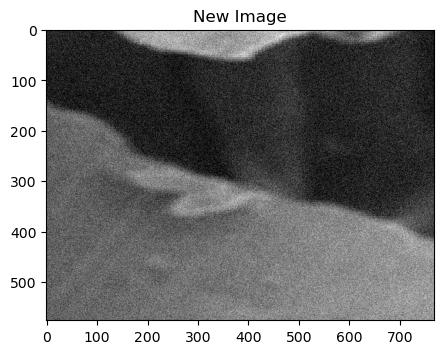

In [36]:
settings.image.reduced_area = FibsemRectangle(0, 0, 0.5, 0.5)
settings.image.beam_type = BeamType.ELECTRON
settings.image.resolution = [1536,1152]
settings.image.hfw = 450e-6
reduced = microscope.acquire_image(settings.image)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.imshow(reduced.data, cmap="gray")
ax.set_title("New Image")

Auto contrast and autofocus

Electron beam WD: 0.06
2023-04-18 14:07:50,862 — root — INFO — auto_focus:2376 — Running autofocus on electron beam.
Electron beam WD: 0.05976833953
2023-04-18 14:07:55,004 — root — INFO — acquire_image:2103 — acquiring new ELECTRON image.


Text(0.5, 1.0, 'New Image')

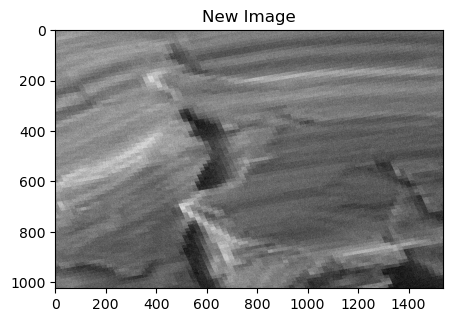

In [11]:
print(f"Electron beam WD: {microscope.get('working_distance', beam_type=BeamType.ELECTRON)}")
microscope.auto_focus(beam_type=BeamType.ELECTRON)
print(f"Electron beam WD: {microscope.get('working_distance', beam_type=BeamType.ELECTRON)}")
settings.image.beam_type = BeamType.ELECTRON
img = microscope.acquire_image(settings.image)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.imshow(img.data, cmap="gray")
ax.set_title("New Image")

Ion beam contrast: 0.5
Ion beam brightness: 0.5
2023-04-18 14:07:58,034 — root — INFO — autocontrast:2366 — Running autocontrast on ION.
Ion beam contrast: 0.421875
Ion beam brightness: 0.5125
2023-04-18 14:08:06,117 — root — INFO — acquire_image:2103 — acquiring new ION image.


Text(0.5, 1.0, 'New Image')

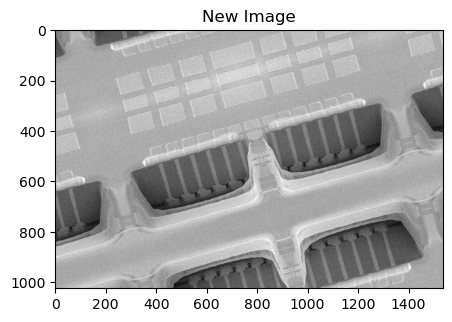

In [12]:
print(f"Ion beam contrast: {microscope.get('detector_contrast', beam_type=BeamType.ION)}")
print(f"Ion beam brightness: {microscope.get('detector_brightness', beam_type=BeamType.ION)}")
microscope.autocontrast(beam_type=BeamType.ION)
print(f"Ion beam contrast: {microscope.get('detector_contrast', beam_type=BeamType.ION)}")
print(f"Ion beam brightness: {microscope.get('detector_brightness', beam_type=BeamType.ION)}")
settings.image.beam_type = BeamType.ION
img = microscope.acquire_image(settings.image)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.imshow(img.data, cmap="gray")
ax.set_title("New Image")

Electron beam contrast: 0.5
Electron beam brightness: 0.5
2023-04-18 14:08:09,321 — root — INFO — autocontrast:2366 — Running autocontrast on ELECTRON.
Electron beam contrast: 0.875
Electron beam brightness: 0.3875
2023-04-18 14:08:10,640 — root — INFO — acquire_image:2103 — acquiring new ELECTRON image.


Text(0.5, 1.0, 'New Image')

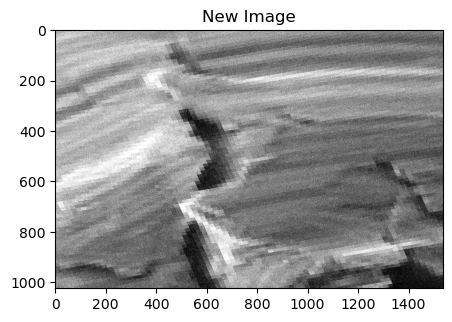

In [13]:
print(f"Electron beam contrast: {microscope.get('detector_contrast', beam_type=BeamType.ELECTRON)}")
print(f"Electron beam brightness: {microscope.get('detector_brightness', beam_type=BeamType.ELECTRON)}")
microscope.autocontrast(beam_type=BeamType.ELECTRON)
print(f"Electron beam contrast: {microscope.get('detector_contrast', beam_type=BeamType.ELECTRON)}")
print(f"Electron beam brightness: {microscope.get('detector_brightness', beam_type=BeamType.ELECTRON)}")
settings.image.beam_type = BeamType.ELECTRON
img = microscope.acquire_image(settings.image)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.imshow(img.data, cmap="gray")
ax.set_title("New Image")

Beam shift

In [14]:
print(microscope.get("shift", beam_type=BeamType.ELECTRON))
microscope.reset_beam_shifts()
print(microscope.get("shift", beam_type=BeamType.ELECTRON))

Point(x=9.991227548e-07, y=9.918065024000001e-07)
Point(x=0.0, y=-0.0)


In [15]:
print(microscope.get("shift", beam_type=BeamType.ELECTRON))
microscope.beam_shift(dx=1e-6, dy=1e-6, beam_type=BeamType.ELECTRON)
print(microscope.get("shift", beam_type=BeamType.ELECTRON))

assert microscope.get("shift", beam_type=BeamType.ELECTRON) == Point(1e-6, 1e-6)

Point(x=0.0, y=-0.0)
2023-04-18 14:08:13,846 — root — INFO — beam_shift:2416 — ELECTRON shifting by (1e-06, 1e-06)
Point(x=1e-06, y=1e-06)


## Movement

Absolute & Relative movement

In [16]:
move = FibsemStagePosition(x=0.0001, y=0.0001, z=0.0060, r = 0.01, t = 0.01)
abs_position = microscope.get_stage_position().__add__(move)
microscope.move_stage_absolute(abs_position)
current_position = microscope.get_stage_position()
difference = current_position.__sub__(abs_position)
assert difference.x < 1e-8
assert difference.y < 1e-8
assert difference.z < 1e-8
assert difference.r < 1e-3
assert difference.t < 1e-3


2023-04-18 14:08:13,993 — root — INFO — move_stage_absolute:2517 — Moving stage to FibsemStagePosition(x=0.004300000000000001, y=0.004300000000000001, z=0.081, r=0.2800000002001504, t=0.9175712110370514, coordinate_system='RAW').


In [10]:
microscope.move_stage_absolute(FibsemStagePosition(x=0.0001, y=0.0001, z=0.060, r = 0.0, t = 0.0))

2023-04-18 16:22:15,137 — root — INFO — move_stage_absolute:2517 — Moving stage to FibsemStagePosition(x=0.0001, y=0.0001, z=0.06, r=0.0, t=0.0, coordinate_system=None).


In [11]:
current_position = microscope.get_stage_position()
rel_position = FibsemStagePosition(x=0.001, y=0.001, z=0.001, r = 0.05, t = 0.05)
abs_position = current_position.__add__(rel_position)
microscope.move_stage_relative(rel_position)
current_position2 = microscope.get_stage_position()
difference = current_position2.__sub__(abs_position)
assert difference.x < 1e-8
assert difference.y < 1e-8
assert difference.z < 1e-8
assert difference.r < 1e-3
assert difference.t < 1e-3

2023-04-18 16:22:32,677 — root — INFO — move_stage_relative:2544 — Moving stage by FibsemStagePosition(x=0.001, y=0.001, z=0.001, r=0.05, t=0.05, coordinate_system=None).
2023-04-18 16:22:32,679 — root — INFO — move_stage_absolute:2517 — Moving stage to FibsemStagePosition(x=0.09487710911, y=-2.886436774, z=60.07102389, r=0.0, t=0.0, coordinate_system=None).


Exception: CollisionDetected (-3)

Move flat to beam

In [18]:
microscope.move_flat_to_beam(settings, beam_type=BeamType.ELECTRON)
assert math.isclose(microscope.get_stage_position().t*constants.RADIANS_TO_DEGREES, settings.system.stage.tilt_flat_to_electron, abs_tol=1e-3)


2023-04-18 14:08:19,276 — root — INFO — move_flat_to_beam:2706 — Moving Stage Flat to ELECTRON Beam


In [19]:
microscope.move_flat_to_beam(settings, beam_type=BeamType.ION)
assert math.isclose(microscope.get_stage_position().t, settings.system.stage.tilt_flat_to_ion*constants.DEGREES_TO_RADIANS , abs_tol=1e-6)

2023-04-18 14:08:20,292 — root — INFO — move_flat_to_beam:2706 — Moving Stage Flat to ION Beam


## Microscope state 

In [20]:
current_state = microscope.get_current_microscope_state()
current_position = microscope.get_stage_position()
assert current_state.absolute_position.x == current_position.x
assert current_state.absolute_position.y == current_position.y
assert current_state.absolute_position.z == current_position.z
assert math.isclose(current_state.absolute_position.r, current_position.r, abs_tol=1e-6)
assert math.isclose(current_state.absolute_position.t, current_position.t, abs_tol=1e-6)
assert math.isclose(current_state.eb_settings.beam_current, microscope.get("current", beam_type=BeamType.ELECTRON), abs_tol=1e-6)
assert math.isclose(current_state.ib_settings.beam_current, microscope.get("current", beam_type=BeamType.ION), abs_tol=1e-6)
assert current_state.eb_settings.working_distance == microscope.get("working_distance", beam_type=BeamType.ELECTRON)
assert current_state.eb_settings.hfw == microscope.get("hfw", beam_type=BeamType.ELECTRON)
assert current_state.ib_settings.hfw == microscope.get("hfw", beam_type=BeamType.ION)


## Milling: PLEASE MANUALLY MOVE TO APPROPRIATE MILLING POSITION BEFORE EACH PATTERN

Set field width to desired value

In [21]:
settings.image.hfw = 150-6

Line pattern 


2023-04-18 14:08:21,603 — root — INFO — run_milling:2924 — running ion beam milling now...
 |----------------------------------------------------------------------------------------------------| 0% 
 |███████████████████████████████████████████████████-------------------------------------------------| 51% 
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100% Finished

2023-04-18 14:08:23,627 — root — INFO — finish_milling:74 — changing to imaging current: 2.00e-11
hello
2023-04-18 14:08:23,629 — root — INFO — finish_milling:76 — finished ion beam milling.
2023-04-18 14:08:23,629 — root — INFO — acquire_image:2103 — acquiring new ION image.


Text(0.5, 1.0, 'Post Milling Image')

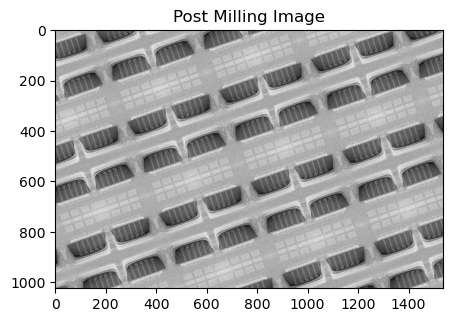

In [22]:
line = FibsemPatternSettings(
    pattern= FibsemPattern.Line,
    start_x=0.0,
    start_y=0.0,
    end_x=20e-6,
    end_y=20e-6,
    depth=1e-6,
)

milling.milling_protocol(
    microscope,
    settings.milling,
    patterns=[line],
    drift_correction=False,
)

settings.image.beam_type = BeamType.ION
img = microscope.acquire_image(settings.image)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.imshow(img.data, cmap="gray")
ax.set_title("Post Milling Image")

Set field width to desired value AND MOVE TO APPROPRIATE POSITION

In [23]:
settings.image.hfw = 150-6

Rectangle pattern

2023-04-18 14:08:27,151 — root — INFO — draw_rectangle:3071 — Scan direction TopToBottom not supported. Using Flyback instead.
2023-04-18 14:08:27,152 — root — INFO — draw_rectangle:3072 — Supported scan directions are: Flyback, RLE, SpiralInsideOut, SpiralOutsideIn, ZigZag
2023-04-18 14:08:27,154 — root — INFO — run_milling:2924 — running ion beam milling now...
 |----------------------------------------------------------------------------------------------------| 0% 
 |█---------------------------------------------------------------------------------------------------| 1% 
 |██--------------------------------------------------------------------------------------------------| 3% 
 |████------------------------------------------------------------------------------------------------| 4% 
 |█████-----------------------------------------------------------------------------------------------| 5% 
 |██████--------------------------------------------------------------------------------------

Text(0.5, 1.0, 'Post Milling Image')

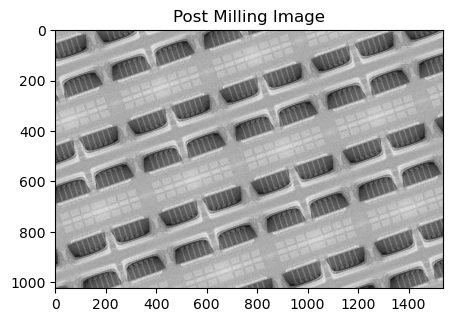

In [24]:
rectangle = FibsemPatternSettings(
    pattern= FibsemPattern.Rectangle,
    centre_x = 0.0,
    centre_y = 0.0,
    width = 20e-6,
    height = 20e-6,
    depth = 1e-6,
)

milling.milling_protocol(
    microscope,
    settings.milling,
    patterns=[rectangle],
    drift_correction=False,
)

settings.image.beam_type = BeamType.ION
img = microscope.acquire_image(settings.image)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.imshow(img.data, cmap="gray")
ax.set_title("Post Milling Image")

Set field width to desired value AND MOVE TO APPROPRIATE POSITION

In [25]:
settings.image.hfw = 150-6

Circle pattern

2023-04-18 14:09:01,733 — root — INFO — run_milling:2924 — running ion beam milling now...
 |----------------------------------------------------------------------------------------------------| 0% 
 |█---------------------------------------------------------------------------------------------------| 2% 
 |███-------------------------------------------------------------------------------------------------| 4% 
 |█████-----------------------------------------------------------------------------------------------| 5% 
 |███████---------------------------------------------------------------------------------------------| 7% 
 |█████████-------------------------------------------------------------------------------------------| 9% 
 |████████████----------------------------------------------------------------------------------------| 12% 
 |██████████████--------------------------------------------------------------------------------------| 15% 
 |█████████████████------------------------

Text(0.5, 1.0, 'Post Milling Image')

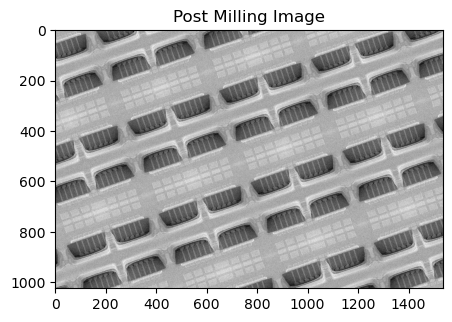

In [26]:
circle = FibsemPatternSettings(
    pattern= FibsemPattern.Circle,
    centre_x = 0.0,
    centre_y = 0.0,
    radius = 10e-6,
    depth = 1e-6,
)

milling.milling_protocol(
    microscope,
    settings.milling,
    patterns=[circle],
    drift_correction=False,
)

settings.image.beam_type = BeamType.ION
img = microscope.acquire_image(settings.image)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.imshow(img.data, cmap="gray")
ax.set_title("Post Milling Image")

Trench pattern

In [27]:
settings.protocol = {
"lamella" : {
    "protocol_stages" : 
    [{"lamella_width": 10.e-6,
        "lamella_height": 800.e-9,
        "trench_height": 10.e-6,
        "milling_depth": 1.e-6,
        "offset": 2.e-6,
        "size_ratio": 1.0,
        "milling_current": 2.e-9},
    {"lamella_width": 10.e-6,
        "lamella_height": 800.e-9,
        "trench_height": 2.e-6,
        "milling_depth": 1.e-6,
        "offset": 0.5e-6,
        "size_ratio": 1.0,
        "milling_current": 0.74e-9},
    {"lamella_width": 10.e-6,
        "lamella_height": 800.e-9,
        "trench_height": 0.5e-6,
        "milling_depth": 0.4e-6,
        "offset": 0.0e-6,
        "size_ratio": 1.0,
        "milling_current": 60.0e-12}]
  }
}

Set field width to desired value AND MOVE TO APPROPRIATE POSITION

In [28]:
settings.image.hfw = 150-6

2023-04-18 14:09:29,471 — root — INFO — draw_rectangle:3071 — Scan direction BottomToTop not supported. Using Flyback instead.
2023-04-18 14:09:29,472 — root — INFO — draw_rectangle:3072 — Supported scan directions are: Flyback, RLE, SpiralInsideOut, SpiralOutsideIn, ZigZag
2023-04-18 14:09:29,473 — root — INFO — draw_rectangle:3071 — Scan direction TopToBottom not supported. Using Flyback instead.
2023-04-18 14:09:29,474 — root — INFO — draw_rectangle:3072 — Supported scan directions are: Flyback, RLE, SpiralInsideOut, SpiralOutsideIn, ZigZag
2023-04-18 14:09:29,475 — root — INFO — draw_rectangle:3071 — Scan direction BottomToTop not supported. Using Flyback instead.
2023-04-18 14:09:29,476 — root — INFO — draw_rectangle:3072 — Supported scan directions are: Flyback, RLE, SpiralInsideOut, SpiralOutsideIn, ZigZag
2023-04-18 14:09:29,476 — root — INFO — draw_rectangle:3071 — Scan direction TopToBottom not supported. Using Flyback instead.
2023-04-18 14:09:29,477 — root — INFO — draw_rec

Text(0.5, 1.0, 'Post Milling Image')

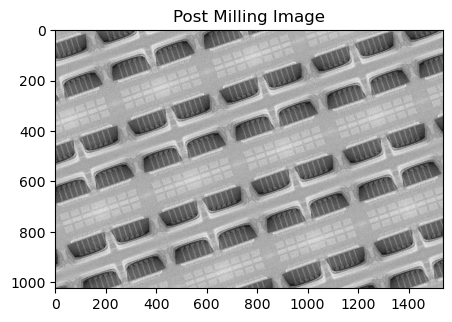

In [29]:
patterns = []
for i, protocol in enumerate(
            settings.protocol["lamella"]["protocol_stages"]
        ):
        protocol["milling_depth"] = 0.1e-6
        lower_pattern_settings, upper_pattern_settings = milling.extract_trench_parameters(protocol, Point(0, 0))
        patterns.append(lower_pattern_settings)
        patterns.append(upper_pattern_settings)

milling.milling_protocol(
    microscope,
    settings.milling,
    patterns=patterns,
    drift_correction=False,
)

settings.image.beam_type = BeamType.ION
img = microscope.acquire_image(settings.image)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.imshow(img.data, cmap="gray")
ax.set_title("Post Milling Image")

## Sputter platinum

In [30]:
protocol = {}
protocol["hfw"] = 150e-6
protocol["beam_current"] = 2e-9
protocol["spot_size"] = 0.1e-6
protocol["dwell_time"] = 0.1e-6
protocol["application_file"] = "Pt dep"
protocol["position"] = "Electron Default"
protocol["gas"] = "Pt"
microscope.setup_sputter(
    protocol
)
microscope.draw_sputter_pattern(
    hfw = 150e-6,
    line_pattern_length = 20e-6,
)
microscope.run_sputter()
microscope.finish_sputter()

Exception: InvalidRequest (-1)

## Get/Set parameters

In [36]:
microscope.set("on", True, beam_type=BeamType.ELECTRON)
assert microscope.get("on", beam_type=BeamType.ELECTRON) == True
microscope.set("on", True, beam_type=BeamType.ION)
assert microscope.get("on", beam_type=BeamType.ION) == True

2023-04-18 14:17:20,425 — root — INFO — set:3560 — ELECTRON beam turned on.
2023-04-18 14:17:23,055 — root — INFO — set:3560 — ION beam turned on.


In [ ]:
microscope.set('working_distance', 0.06, beam_type=BeamType.ELECTRON)
assert microscope.get('working_distance', beam_type=BeamType.ELECTRON) == 0.06

2023-04-18 12:49:57,617 — root — INFO — set:3526 — Electron beam working distance set to 0.06 m.


In [ ]:
microscope.set("current", 2e-11, beam_type=BeamType.ELECTRON)
assert math.isclose(microscope.get("current", beam_type=BeamType.ELECTRON), 2e-11, abs_tol=1e-12)

2023-04-18 12:49:59,322 — root — INFO — set:3534 — Electron beam current set to 2e-11 A.


In [ ]:
microscope.set("voltage", 5000, beam_type=BeamType.ELECTRON)
assert microscope.get("voltage", beam_type=BeamType.ELECTRON) == 5000

2023-04-18 13:36:54,505 — root — INFO — set:3542 — Electron beam voltage set to 5000 V.


In [ ]:
microscope.set("hfw", 150e-6, beam_type=BeamType.ELECTRON)
assert microscope.get("hfw", beam_type=BeamType.ELECTRON) == 150e-6
microscope.set("hfw", 150e-6, beam_type=BeamType.ION)
assert microscope.get("hfw", beam_type=BeamType.ION) == 150e-6

2023-04-18 12:50:17,512 — root — INFO — set:3548 — ELECTRON HFW set to 0.00015 m.
2023-04-18 12:50:17,513 — root — INFO — set:3548 — ION HFW set to 0.00015 m.


In [ ]:
microscope.set("scan_rotation", 180, beam_type=BeamType.ELECTRON)
assert microscope.get("scan_rotation", beam_type=BeamType.ELECTRON) == 180
microscope.set("scan_rotation", 180, beam_type=BeamType.ION)
assert microscope.get("scan_rotation", beam_type=BeamType.ION) == 180

2023-04-18 13:36:57,544 — root — INFO — set:3554 — ELECTRON scan rotation set to 180 degrees.
2023-04-18 13:36:57,546 — root — INFO — set:3554 — ION scan rotation set to 180 degrees.


In [ ]:
microscope.set("detector_type", "E-T", beam_type=BeamType.ELECTRON)
assert microscope.get("detector_type", beam_type=BeamType.ELECTRON) == "E-T"
microscope.set("detector_type", "SE", beam_type=BeamType.ION)
assert microscope.get("detector_type", beam_type=BeamType.ION) == "SE"

2023-04-18 13:36:59,678 — root — INFO — set:3575 — BeamType.ELECTRON detector type set to E-T.
2023-04-18 13:36:59,683 — root — INFO — set:3581 — BeamType.ION detector type set to SE.


In [ ]:
if isinstance(microscope, ThermoMicroscope):
    microscope.set("detector_mode", "SecondaryElectrons", BeamType.ELECTRON)
    assert microscope.get("detector_mode") == BeamType.ELECTRON
    microscope.set("detector_mode", "SecondaryElectrons", BeamType.ION)
    assert microscope.get("detector_mode") == BeamType.ION

In [ ]:
microscope.set("detector_brightness", 0.5, beam_type=BeamType.ELECTRON)
assert microscope.get("detector_brightness", beam_type=BeamType.ELECTRON) == 0.5
microscope.set("detector_brightness", 0.5, beam_type=BeamType.ION)
assert microscope.get("detector_brightness", beam_type=BeamType.ION) == 0.5

2023-04-18 13:37:03,201 — root — INFO — set:3590 — BeamType.ELECTRON detector brightness set to 0.5.
2023-04-18 13:37:03,204 — root — INFO — set:3594 — BeamType.ION detector brightness set to 0.5.


In [ ]:
microscope.set("detector_contrast", 0.5, beam_type=BeamType.ELECTRON)
assert microscope.get("detector_contrast", beam_type=BeamType.ELECTRON) == 0.5
microscope.set("detector_contrast", 0.5, beam_type=BeamType.ION)
assert microscope.get("detector_contrast", beam_type=BeamType.ION) == 0.5

2023-04-18 13:37:04,591 — root — INFO — set:3603 — BeamType.ELECTRON detector contrast set to 0.5.
2023-04-18 13:37:04,593 — root — INFO — set:3607 — BeamType.ION detector contrast set to 0.5.


## Needle testing

In [37]:
microscope.get_manipulator_position()

FibsemManipulatorPosition(x=0.004, y=0.013236402999999999, z=0.009265302, r=0.0, t=0.0, coordinate_system=None)

Insert/Retract

In [38]:
if isinstance(microscope, ThermoMicroscope):
    microscope.insert_manipulator(name="PARK")

    microscope.retract_manipulator()

Relative move

In [39]:
current_position = microscope.get_manipulator_position()
move = FibsemManipulatorPosition(x = 0.001, y = 0.001, z = 0.001, r = 0.001, t= 0.001)
new_position = current_position.__add__(move)
microscope.move_manipulator_relative(rel_position)

2023-04-18 14:17:27,167 — root — INFO — move_manipulator_relative:2748 — moving manipulator by FibsemStagePosition(x=0.001, y=0.001, z=0.001, r=0.05, t=0.05, coordinate_system=None)


Absolute move

In [40]:
current_position = microscope.get_manipulator_position()
move = FibsemManipulatorPosition(x = 0.001, y = 0.001, z = 0.001, r = 0.001, t= 0.001)
abs_move = current_position.__add__(move)
microscope.move_manipulator_absolute(abs_move)

2023-04-18 14:17:29,619 — root — INFO — move_manipulator_absolute:2763 — moving manipulator to FibsemManipulatorPosition(x=0.006, y=0.015236402999999999, z=0.011265302000000001, r=0.001, t=0.001, coordinate_system=None)


Corrected movement

In [ ]:
microscope.move_manipulator_corrected(dx = 0.001, dy = 0.001, beam_type= BeamType.ELECTRON)

In [ ]:
microscope.move_manipulator_corrected(dx = 0.001, dy = 0.001, beam_type= BeamType.ION)